In [1]:
#A place for the imports
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## Data exploration


In [2]:
abalone = pd.read_csv("abalone.csv")
abalone.columns=['Sex','Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight', 
                 'Shell weight','Rings']
abalone.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3308,I,0.485,0.355,0.120,0.5085,0.2100,0.1220,0.135,9
3701,F,0.665,0.540,0.195,1.7640,0.8505,0.3615,0.470,11
334,M,0.620,0.465,0.190,1.3415,0.5705,0.3175,0.355,11
118,M,0.405,0.305,0.085,0.2605,0.1145,0.0595,0.085,8
2334,M,0.610,0.490,0.150,1.1030,0.4250,0.2025,0.360,23


In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB




There are 8 numerical not-null features in the data. Feature Sex will need to be changed to dummy values in data preparation in order to use it in the model.

Let's investigate further the data as there is a possibility that some of the values that are not null are set to 0 instead.




In [4]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


As mentioned it seems that there are minimum values in Height that are 0

In [5]:
abalone[abalone.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1256,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3995,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


There are two records where Height is equal to 0, it is possible that it was hard to measure it or it was simply omitted. Nevertheless, this can be treated as a NULL value and since there are only two records like that it will be simplest to ignore them.

In [6]:
abalone = abalone[abalone.Height > 0]
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4174.000000,4174.00000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
mean,0.524081,0.40795,0.139594,0.829080,0.359509,0.180672,0.238855,9.933876
std,0.120079,0.09923,0.041725,0.490384,0.221971,0.109612,0.139222,3.223660
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442125,0.186125,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153750,0.502000,0.253000,0.328875,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>],
       [<Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>,
        <Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

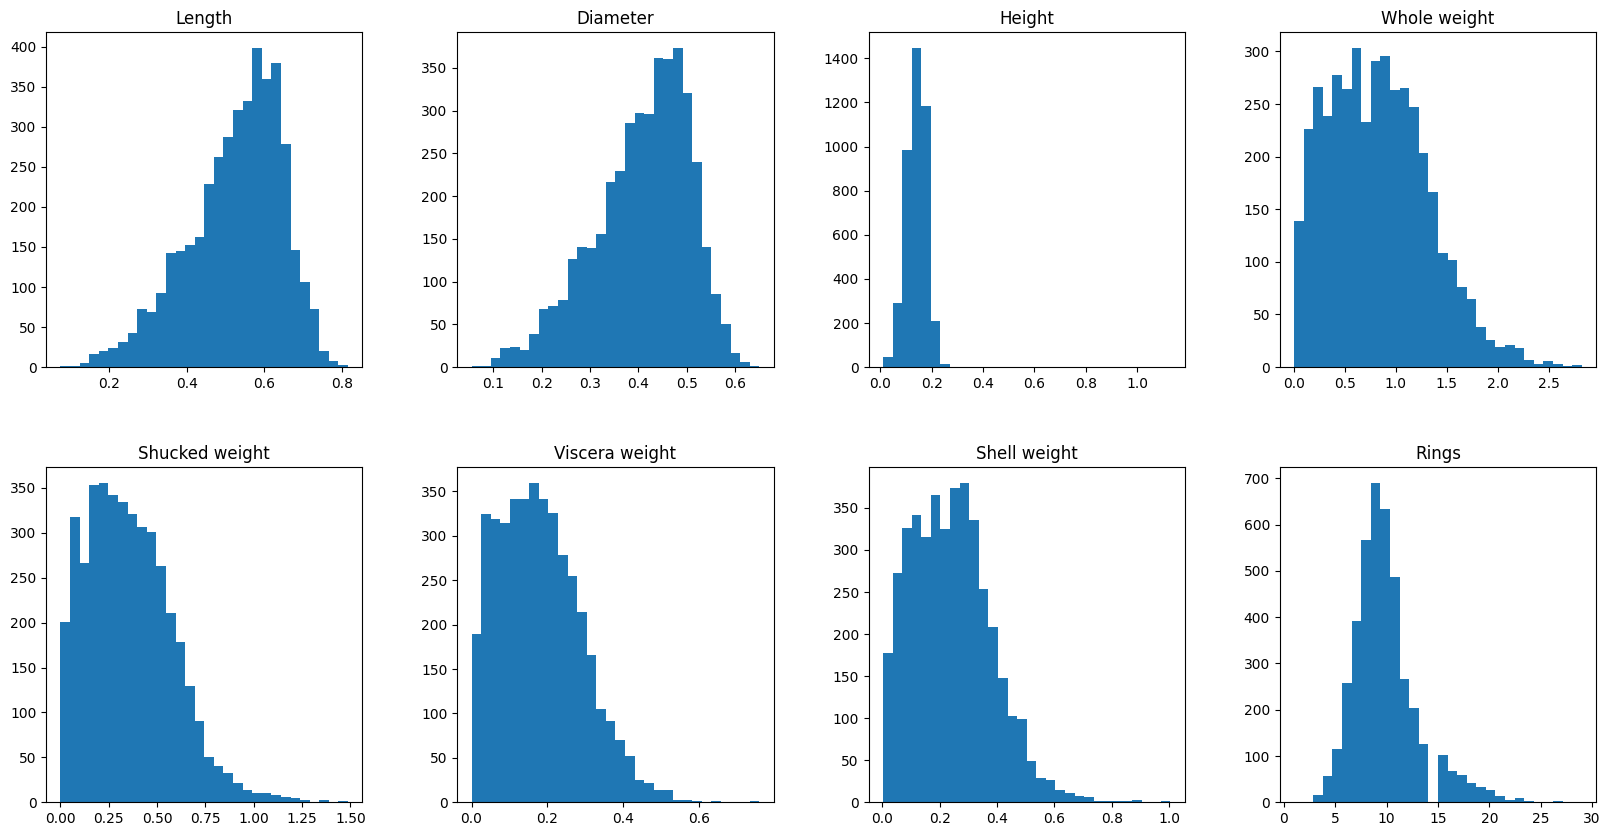

In [7]:
abalone.hist(figsize=(20,10), grid = False, layout=(2,4), bins = 30)

Histograms show that the data may be skewed, so it will be reasonable to measure it. 

It also shows that there are possible outliers in Height and that there might be a strong relationship between the Diameter and Lenght and between Shell weight, Shucked weight Viscera weight and Whole weight.

In [8]:
nf = abalone.select_dtypes(include=[np.number]).columns
cf = abalone.select_dtypes(include=[np.object]).columns

In [9]:
skew_list = stats.skew(abalone[nf])
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.165670
7,Rings,1.114409
4,Shucked weight,0.718103
6,Shell weight,0.620477
5,Viscera weight,0.590854
3,Whole weight,0.529975
1,Diameter,-0.610222
0,Length,-0.641130


Skewness value points in which direction data is distorted in a statistical distribution, in Gaussian distribution the value for skewness is 0. In abalone data Height has highest skewness value followed by Rings.

High skewness in Height feature may be an outcome of outliers. I will investigate it further using scatter plots.

# Scatter plots

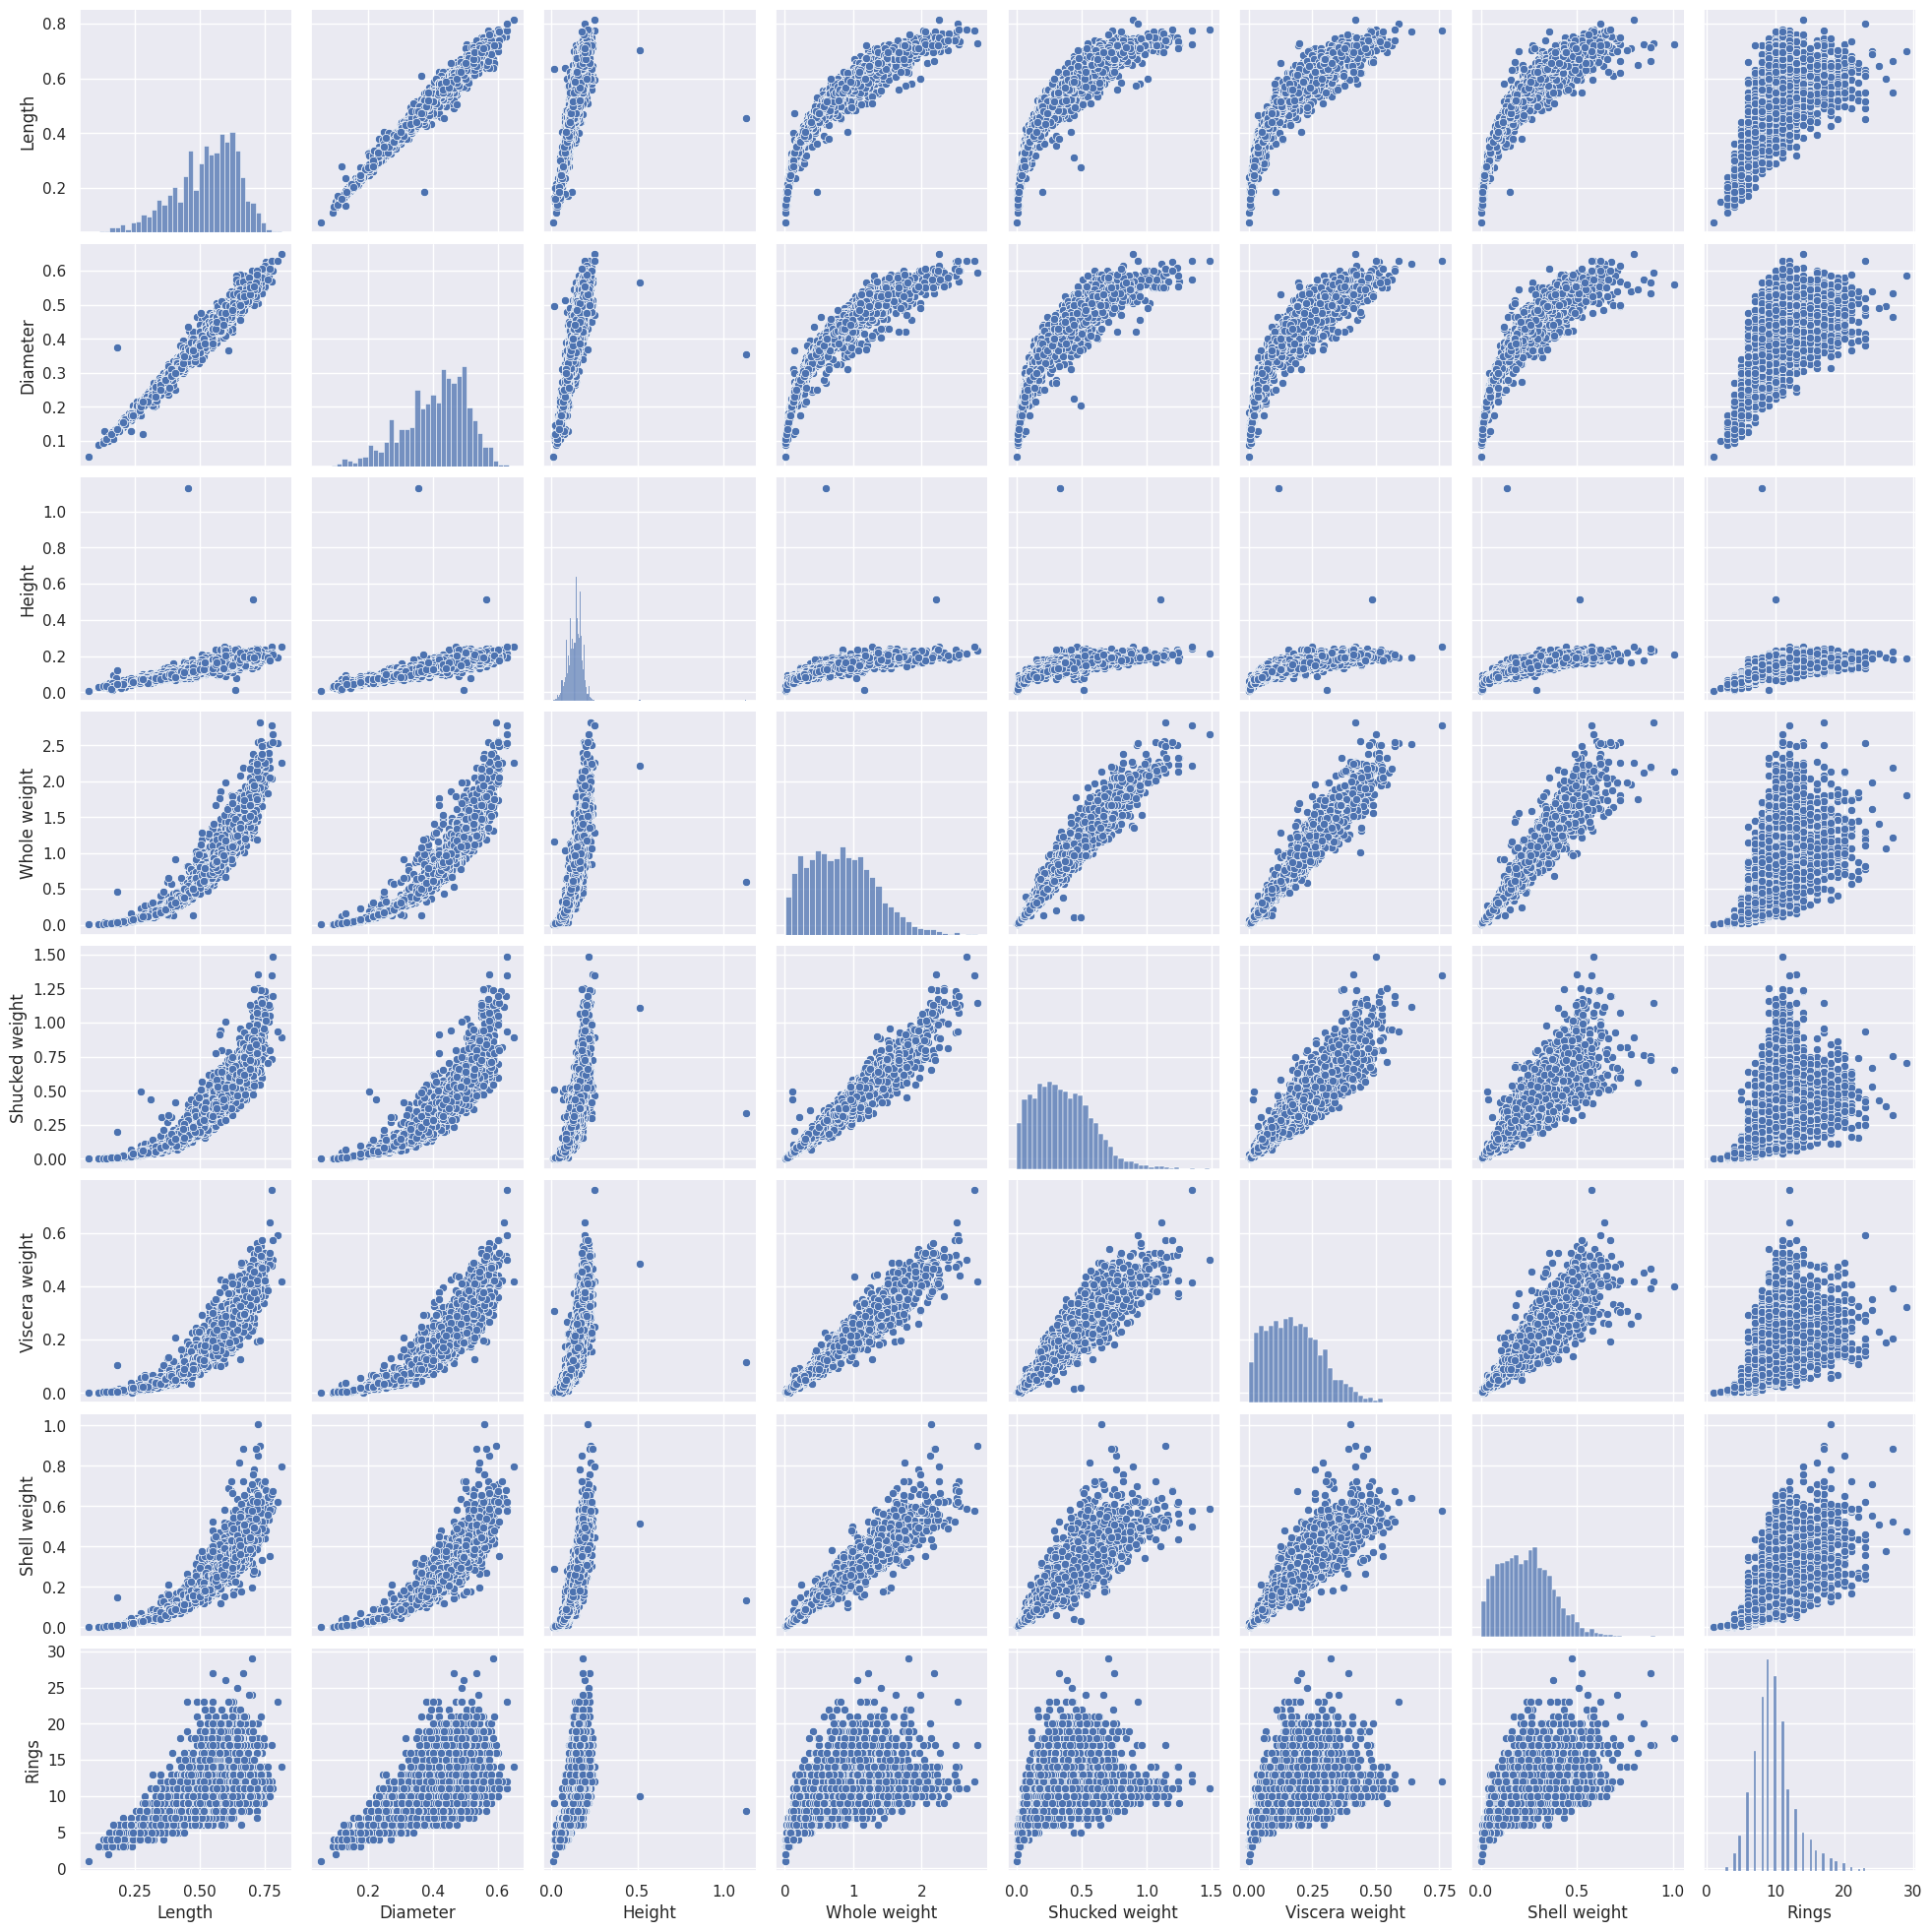

In [10]:
sns.set()
cols = ['Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Rings']
sns.pairplot(abalone[cols], height = 2.5)
plt.show()

Scatter plot analysis also shows that data mostly cover the values for Rings from 3 to little over 20, selecting only this data in the model may be taken under consideration to increase the accuracy.

First I will take a closer look at the Height outliers and then I will investigate correlations between the features.

<Axes: xlabel='Height', ylabel='Rings'>

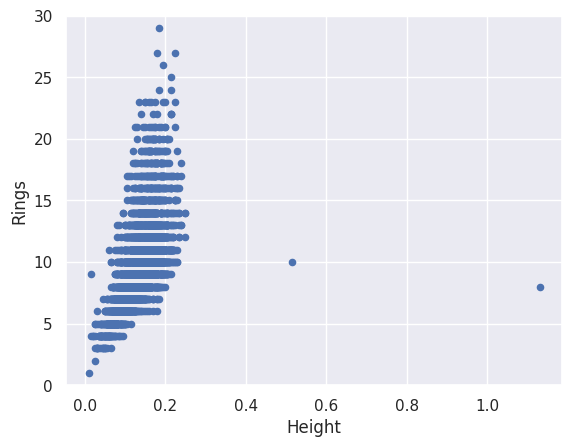

In [11]:
data = pd.concat([abalone['Rings'], abalone['Height']], axis = 1)
data.plot.scatter(x='Height', y='Rings', ylim=(0,30))


Two values seem not to follow the trend, that is why I will treat them as outliers and delete from data.

<Axes: xlabel='Height', ylabel='Rings'>

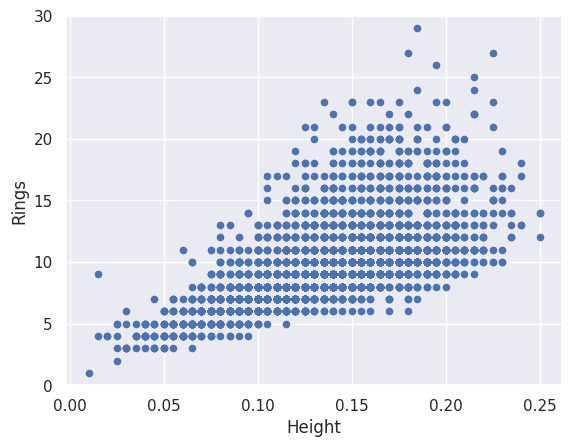

In [12]:
abalone = abalone[abalone.Height < 0.4]
data = pd.concat([abalone['Rings'], abalone['Height']], axis = 1)
data.plot.scatter(x='Height', y='Rings', ylim=(0,30))

array([[<Axes: title={'center': 'Height'}>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

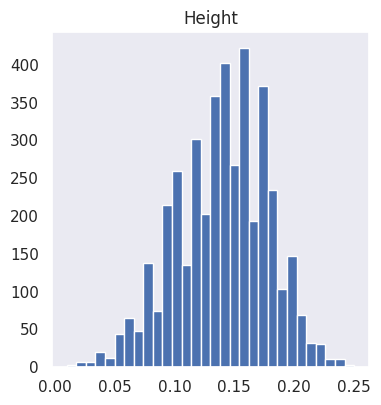

In [13]:
abalone.hist(column = 'Height', figsize=(20,10), grid=False, layout=(2,4), bins = 30)

Deleted data as suspected was the cause for the skewness of Height feature, now it is closer to a normal distribution.

# Correlation matrix

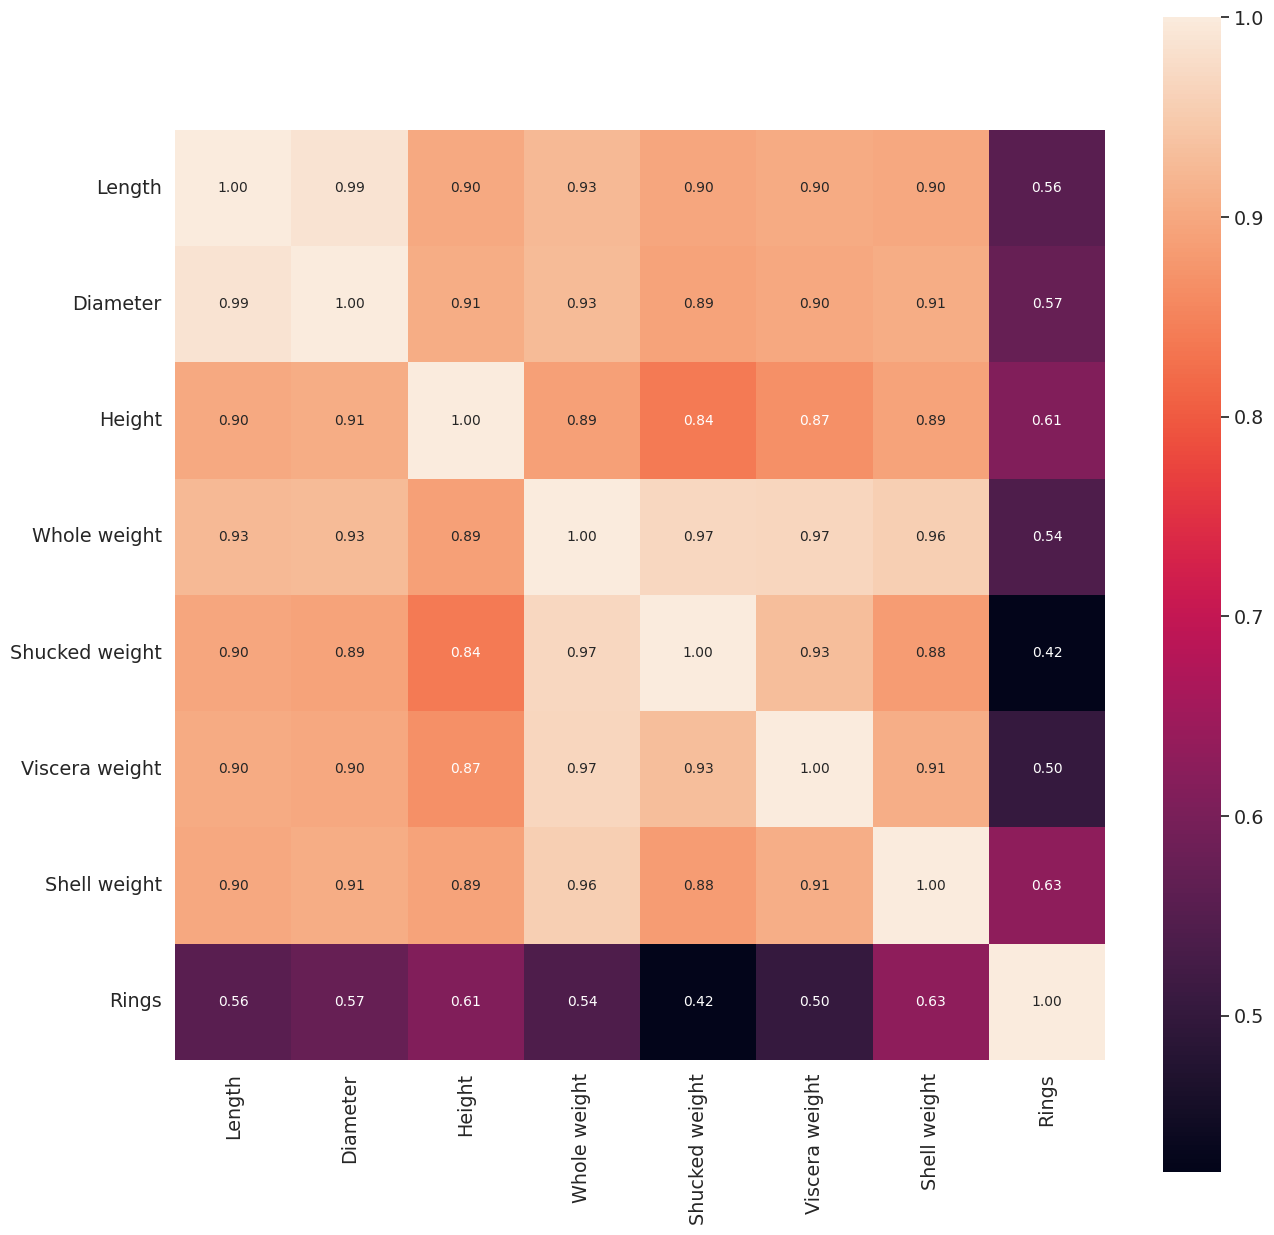

In [14]:
corrmat = abalone.corr()
cols = corrmat.nlargest(8, 'Rings')['Rings'].index
cm = np.corrcoef(abalone[nf].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=nf.values, xticklabels=nf.values)
plt.show()

The heat map shows that features are highly correlated and multicollinearity is possible.

# Categorical Feature


Finally, I will analyse the relation of Rings with the Sex feature

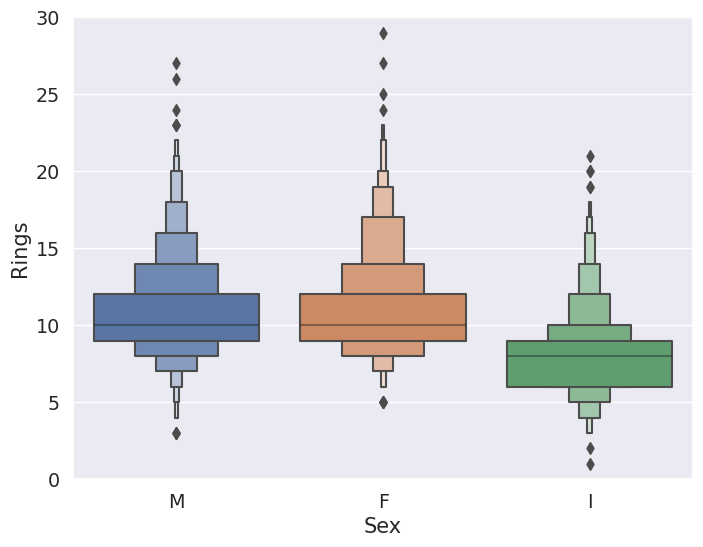

In [15]:
data = pd.concat([abalone['Rings'], abalone['Sex']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Rings", data=abalone)
fig.axis(ymin=0, ymax=30);

## Classification


First I need to use the target value Age and divide it into young, medium and old.

In [16]:
abalone.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [17]:
bins = [0,8,10,abalone['Rings'].max()]
group_names = ['young','medium','old']
abalone['Rings'] = pd.cut(abalone['Rings'],bins, labels = group_names)

In [18]:
dictionary = {'young':0, 'medium':1, 'old':2}
abalone['Rings'] = abalone['Rings'].map(dictionary)

In [19]:
abalone.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,2
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,2
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,1
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,2
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,2


In [20]:
X = abalone.drop(['Rings'], axis = 1)
y = abalone['Rings']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=20, stratify = y)

KNN
The k-Nearest-Neighbors method of classification it is essentially classification by finding the most similar data points in the training data, and making an educated guess based on their classifications.

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=10)

X = abalone.iloc[:, [2, 3]].values
y = abalone.iloc[:, -1].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.577245508982036


This is a pretty good accuracy! However, we may be able to do better by optimizing our value of k.

Using Cross Validation to Get the Best Value of k

In [69]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Plotting results

Text(0, 0.5, 'Accuracy Score')

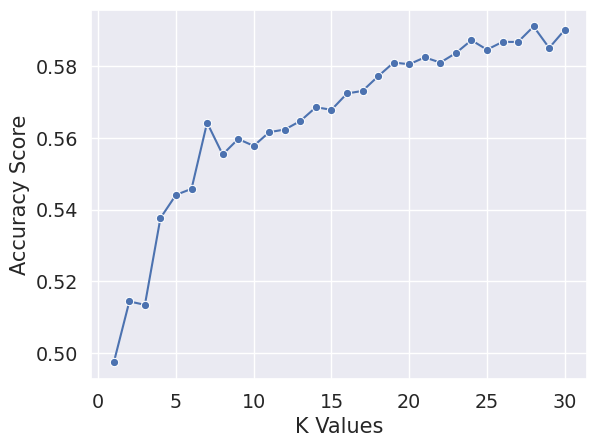

In [70]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

As we see we have the highest accuracy with k=28